<a href="https://colab.research.google.com/github/EvgeniaKantor/DI-Bootcamp/blob/main/Daily_Challenge_W5D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
uploaded = files.upload()
# Make directory named kaggle and copy kaggle.json file there
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d juhi1994/superstore/code

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
400 - Bad Request - Invalid datasetVersionNumber value


In [4]:
!kaggle datasets download -d juhi1994/superstore

  0% 0.00/0.98M [00:00<?, ?B/s]
100% 0.98M/0.98M [00:00<00:00, 118MB/s]


In [5]:
!unzip superstore.zip

Archive:  superstore.zip
  inflating: US Superstore data.xls  


In [12]:
import pandas as pd

# 1. Load the Dataset
df = pd.read_excel('US Superstore data.xls')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [11]:
# 2. Remove Duplicates
initial_shape = df.shape
df.drop_duplicates(inplace=True)
final_shape = df.shape
print("\nInitial dataset shape:", initial_shape)
print("Final dataset shape after removing duplicates:", final_shape)


Initial dataset shape: (9994, 21)
Final dataset shape after removing duplicates: (9994, 21)


This table seems to be in good quality, no duplicates, no missing values, with the correct data types

In [13]:
import plotly.express as px

In [14]:
# Create dataset Sales Trends Over the Years
sales_trends = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
sales_trends.columns = ['Year', 'Total Sales']

In [15]:
print(sales_trends.head())

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


In [16]:
#Create an interactive line chart to show sales trends over the years
line_chart = px.line(sales_trends, x='Year', y='Total Sales', title='Sales Trends Over the Years')
line_chart.update_xaxes(title='Year')
line_chart.update_yaxes(title='Total Sales')
line_chart.show()

In [30]:
unique_countries = df['Country'].unique()
print("Unique Countries:")
print(unique_countries)

unique_countries = df['State'].unique()
print("Unique States:")
print(unique_countries)


Unique Countries:
['United States']
Unique States:
['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [17]:
# Sales Distribution by Country
sales_by_country = df.groupby('Country')['Sales'].sum().reset_index()

world_map = px.choropleth(sales_by_country, locations='Country', locationmode='country names',
                          color='Sales', hover_name='Country', title='Sales Distribution by Country',
                          color_continuous_scale=px.colors.sequential.Plasma)
world_map.show()

In [43]:
# Group data by state and calculate total sales
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()


# Create a new DataFrame with columns 'States' and 'Sales'
new_df = pd.DataFrame({
    'States': sales_by_state['State'],
    'Sales': sales_by_state['Sales']
})

# Display the first few rows of the new DataFrame
print(new_df.head())
print(new_df.info())

       States        Sales
0     Alabama   19510.6400
1     Arizona   35282.0010
2    Arkansas   11678.1300
3  California  457687.6315
4    Colorado   32108.1180
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   States  49 non-null     object 
 1   Sales   49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 912.0+ bytes
None


In [57]:
# Dictionary mapping full state names to abbreviations
state_abbr = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH',
    'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT',
    'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY',
    'District of Columbia': 'DC'
}

# Apply the mapping to convert full state names to abbreviations
new_df['State Abbreviation'] = new_df['States'].map(state_abbr)

# Display the first few rows to verify the conversion
print(new_df.head())

       States        Sales State Abbreviation
0     Alabama   19510.6400                 AL
1     Arizona   35282.0010                 AZ
2    Arkansas   11678.1300                 AR
3  California  457687.6315                 CA
4    Colorado   32108.1180                 CO


In [58]:
# Create an interactive choropleth map for sales distribution by state
us_map = px.choropleth(new_df,
                       locations='State Abbreviation',
                       locationmode='USA-states',
                       color='Sales',
                       hover_name='States',
                       title='Sales Distribution by State in the United States',
                       color_continuous_scale=px.colors.sequential.Plasma)
us_map.show()

In [59]:
from plotnine import *

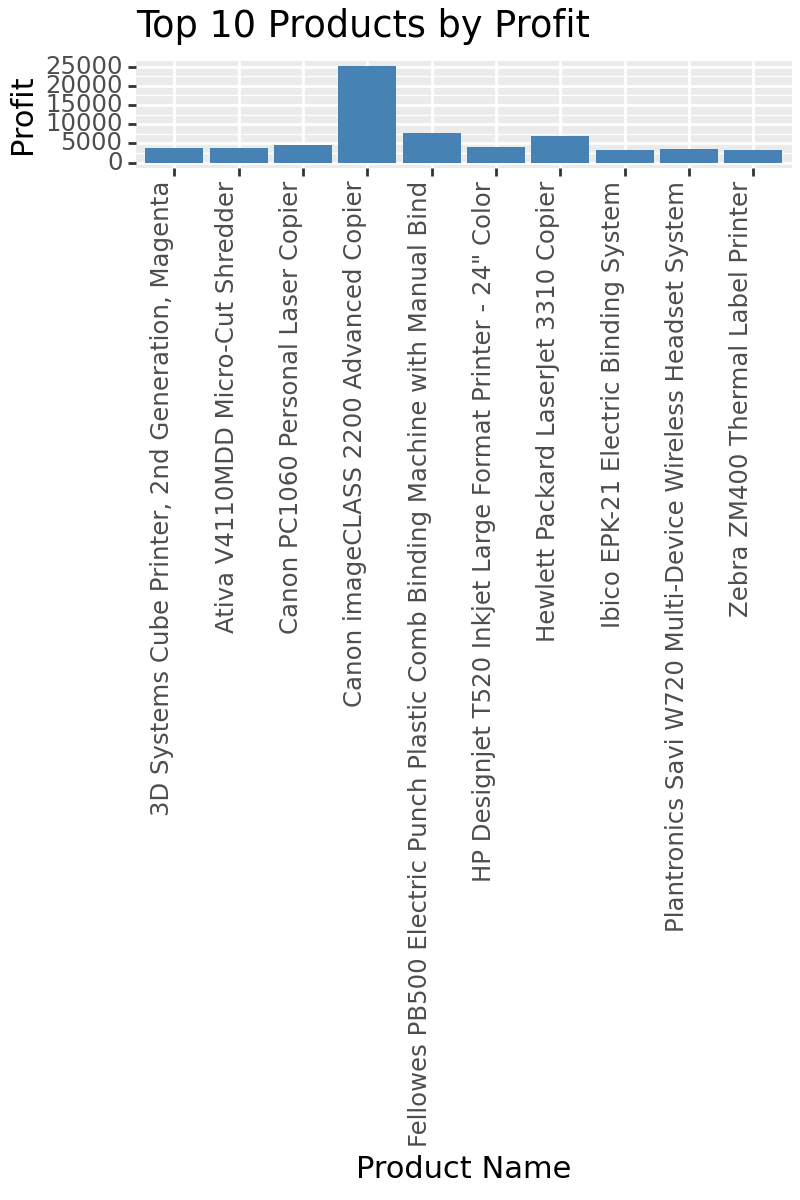

In [65]:
# Task 1: Bar chart showing top 10 products by profit
top_10_products_profit = df.groupby('Product Name')['Profit'].sum().nlargest(10).reset_index()
bar_chart_profit = (ggplot(top_10_products_profit, aes(x='Product Name', y='Profit')) +
    geom_bar(stat='identity', fill='steelblue') +
    labs(title='Top 10 Products by Profit', x='Product Name', y='Profit') +
    theme(axis_text_x=element_text(rotation=90, hjust=1))+
    theme(
        figure_size=(4, 6)  # Adjust the figure size here (width, height)
    )
)

print(bar_chart_profit)

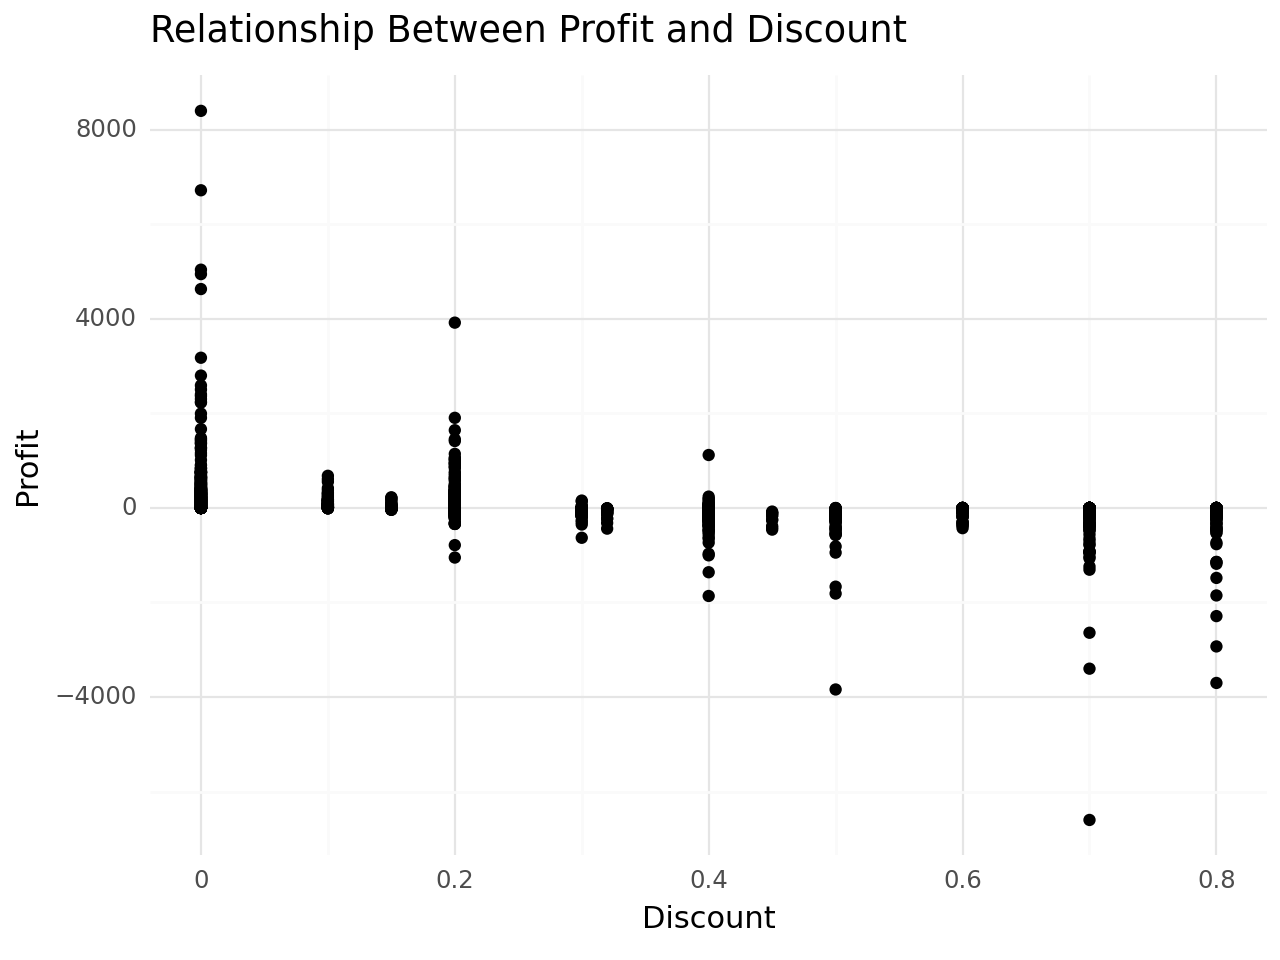

In [70]:
scatter_plot = (
    ggplot(df, aes(x='Discount', y='Profit')) +
    geom_point() +
    labs(x='Discount', y='Profit', title='Relationship Between Profit and Discount') +
    theme_minimal()
)

print(scatter_plot)

Ease of Use:
Plotly: Plotly provides a high level of interactivity and ease of use, especially for users familiar with Python. Its syntax is straightforward and intuitive, making it easy to create interactive visualizations with minimal code.
Plotnine: Plotnine, being a grammar of graphics implementation in Python, follows a similar syntax to ggplot2 in R. It provides a declarative approach to creating visualizations, which may have a steeper learning curve for users new to the grammar of graphics concept.

Effectiveness in Conveying Insights:
Plotly: Plotly offers highly interactive visualizations with features like hover tooltips, zooming, panning, and filtering, which can enhance the exploration of data and insights discovery. It excels in conveying complex relationships and patterns in data.
Plotnine: Plotnine generates static visualizations based on the grammar of graphics principles. While it may not offer the same level of interactivity as Plotly, it can still effectively communicate insights through well-designed plots, especially for static reports or publications.